World population

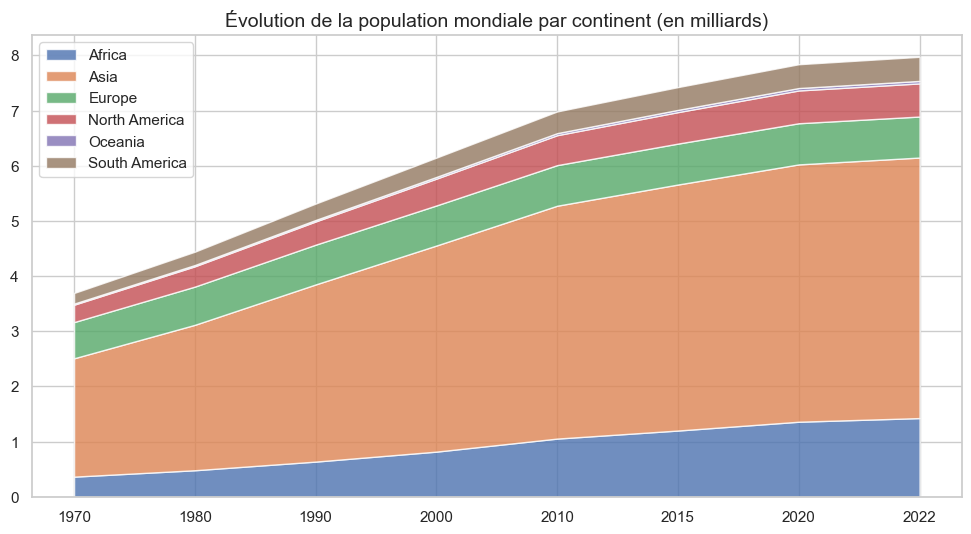

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('world_population.csv')
years_cols = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
year_labels = [col.split(' ')[0] for col in years_cols]

# Agrégation
df_cont = df.groupby('Continent')[years_cols].sum().T
df_cont.index = year_labels

plt.figure(figsize=(12, 6))
plt.stackplot(df_cont.index, df_cont.values.T / 1e9, labels=df_cont.columns, alpha=0.8)
plt.title("Évolution de la population mondiale par continent (en milliards)", fontsize=14)
plt.legend(loc='upper left')
plt.show()

La population mondiale n'a cessé d'augmenter depuis 1970, c'est l'Asie qui a connu la plus grande croissance sur cette période. Aujourd'hui, l'Asie compte les 2 pays les plus peuplés du monde sur son continent.

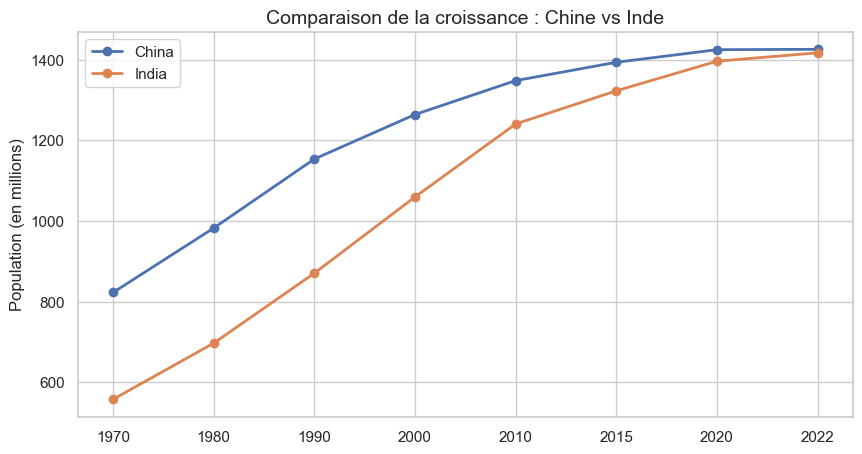

In [39]:
plt.figure(figsize=(10, 5))
for country in ['China', 'India']:
    data = df[df['Country/Territory'] == country][years_cols].T
    plt.plot(year_labels, data.values / 1e6, marker='o', label=country, linewidth=2)

plt.title("Comparaison de la croissance : Chine vs Inde", fontsize=14)
plt.ylabel("Population (en millions)")
plt.legend()
plt.show()

Sur ce graphique on peut voir l'évolution de la population entre la Chine et l'Inde. La croissance démographique de l'Inde était semblable à celle de la Chine entre 1970 et 2000 puis s'est accélérée à partir des années 2000 devenant suffisament rapide pour égaler la Chine en nombre d'habitants en 2022 puis finir par la dépasser en 2025.

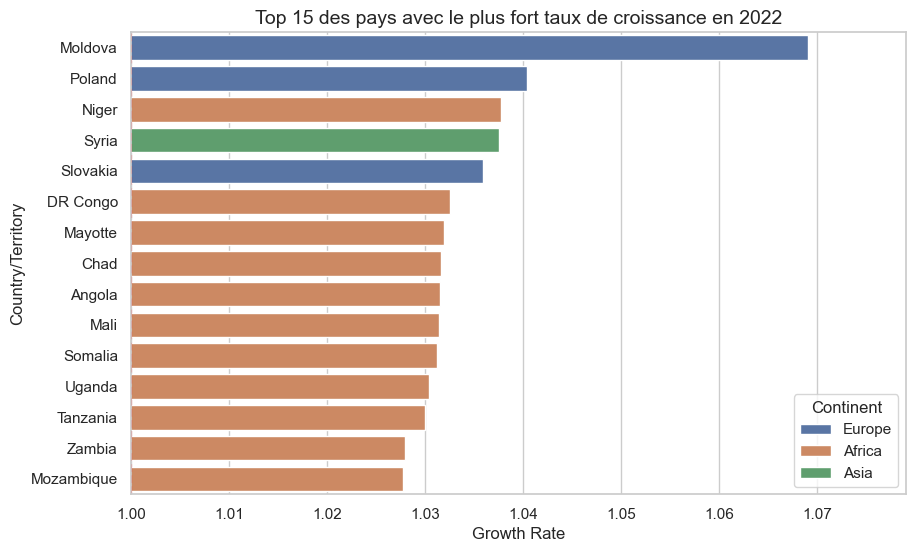

In [40]:
# On prend les 15 pays avec le plus fort taux de croissance
top_growth = df.nlargest(15, 'Growth Rate')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_growth, x='Growth Rate', y='Country/Territory', hue='Continent')
plt.axvline(1.0, color='red', linestyle='--') # Ligne de stagnation
plt.title("Top 15 des pays avec le plus fort taux de croissance en 2022", fontsize=14)
plt.xlim(1.0, top_growth['Growth Rate'].max() + 0.01)
plt.show()

La Moldavie et la Pologne sont les 2 pays ayant la plus grosse croissance démographique dans le Monde en 2022. Parmi le Top 15, 3 pays sont des pays d'Europe, on compte également un pays d'Asie, le reste sont des pays d'Afrique. On peut conclure que c'est l'Afrique qui connait actuellement la plus grande croissance démographique.

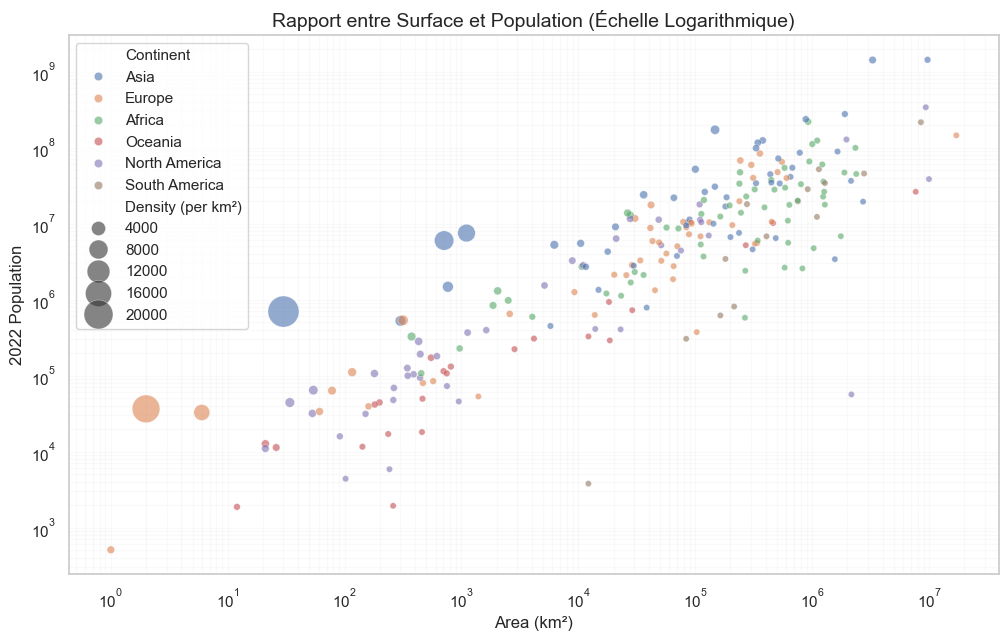

In [41]:
plt.figure(figsize=(12, 7))
# On utilise une échelle logarithmique pour gérer les écarts extrêmes entre pays
sns.scatterplot(data=df, x='Area (km²)', y='2022 Population', hue='Continent', size='Density (per km²)', sizes=(20, 500), alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Rapport entre Surface et Population (Échelle Logarithmique)", fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.1)
plt.show()

Cette visualisation nous montre que certains pays ont beaucoup d'habitants au km², cela concerne surtout les pays d'Amérique du Nord et d'Europe. On voit au contraire que certains pays ont très peu d'habitants au km². 

En l'espace de deux générations, la physionomie de notre planète a radicalement changé. Ce voyage à travers cinquante ans de données nous révèle que l'explosion démographique, autrefois portée par l'Occident et la Chine, s'est déplacée vers de nouveaux épicentres, notamment en Afrique et en Asie du Sud. Nous vivons aujourd'hui un basculement historique où l'Inde devient le nouveau leader mondial, tandis que de nombreuses nations voient leur croissance stagner, signe d'une transition démographique vers une population plus âgée et plus stable.

Cette évolution ne se fait pas sans heurts : la pression sur l'espace physique s'intensifie. Comme le démontrent nos analyses sur la densité, l'humanité doit désormais apprendre à se répartir sur une surface terrestre qui n'est pas extensible. Le défi du XXIe siècle ne sera plus de gérer une croissance infinie, mais de trouver un équilibre durable entre le nombre d'habitants et les ressources limitées de leurs territoires respectifs. Ce dataset nous montre que si nous sommes plus nombreux que jamais, le rythme du monde ralentit enfin, nous offrant une opportunité de repenser notre gestion de l'espace global.